# Running regression end to end

This tutorial aims to train students about regression and machine learning in general, from end-to-end, and to encourage best practices

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
# !pip install matplotlib

## 1. Load Data

- Is about data engineer job
- You work with legacy database
- Most of the time, you will work with AWS / Azure

In [18]:
#load json, csv, mysql
df = pd.read_csv("../data/Life_Expectancy_Data.csv")

In [19]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
type(df.GDP)
#Series - one dimensional table

pandas.core.series.Series

In [31]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [35]:
developing_country = df.Status == "Developing"
adult_mortality    = df['Adult Mortality'] > 265

In [37]:
df_chaky = df[developing_country & adult_mortality]

In [38]:
df_chaky.shape

(553, 22)

## 2. EDA

- Understand your data
- Spend 70% of your time here
- But today, I will do so quickly...but it should not be like this....

### 2.1 Renaming

In [ ]:
df.rename(columns = {'Country':'country', 
                     'Year':'year', 
                     'Status':'status', 
                     'Life expectancy ':'life-exp', 
                     'Adult Mortality':'adult-mort',
                     'infant deaths':'infant-deaths', 
                     'Alcohol':'alcohol', 
                     'percentage expenditure':'per-exp', 
                     'Hepatitis B':'hepa',
                     'Measles ':'measles', 
                     ' BMI ':'bmi', 
                     'under-five deaths ':'under-five-deaths', 
                     'Polio':'polio', 
                     'Total expenditure':'total-exp',
                     'Diphtheria ':'dip', 
                     ' HIV/AIDS':'hiv', 
                     'GDP':'gdp', 
                     'Population':'pop',
                     ' thinness  1-19 years':'thin1-19', 
                     ' thinness 5-9 years':'thin5-9',
                     'Income composition of resources':'income', 
                     'Schooling':'school'}, inplace = True)

### 2.2 Univariate Analysis
- Any visualization that focuses on single variable
- Countplot and distribution plot (histogram)
- Countplot - categorical variable
- Distribution - continuous variable

In [51]:
#what you would do in real world
#is to think - and to come with hypothesis and try to confirm with visualization
# sns.countplot(data = df, x = 'status')  #my data is biased towards develping country

#task 1:  try to do with country
#sns.countplot(data = df, x = 'country')

#task 2:  look at status, but with income > 0.5
# df_income_more = df.income > 0.5
# sns.countplot(data = df_income_more, x = 'income')

In [52]:
df.columns

Index(['country', 'year', 'status', 'life-exp', 'adult-mort', 'infant-deaths',
       'alcohol', 'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths',
       'polio', 'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

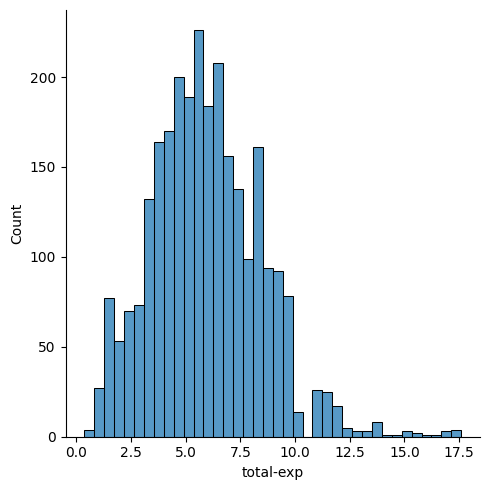

In [ ]:
sns.displot(data = df, x = 'total-exp')
#task 1 = try with life-exp
#sns.displot(data = df, x = 'life-exp')

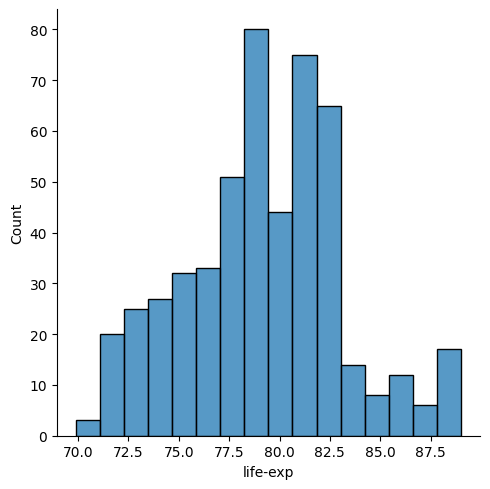

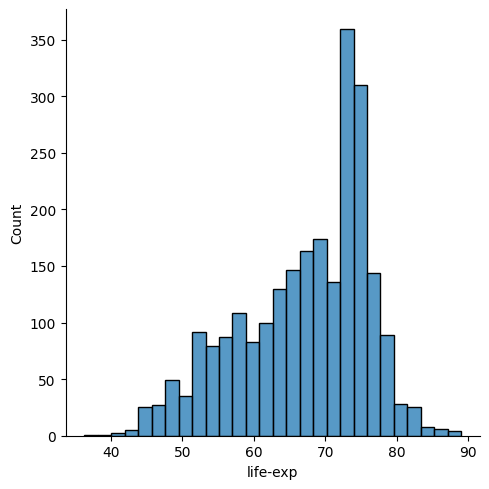

In [60]:
#task 2 = try with life-exp, with status == "Developed" and compared with status == "Developing"
df_developed = df['status'] == 'Developed'
df_developing = df['status'] == 'Developing'
sns.displot(data = df[df_developed], x = 'life-exp')
sns.displot(data = df[df_developing], x = 'life-exp')

In [ ]:
##countplot - cat var
##displot - cont var

### 2.3 Multivariate Analysis
- Any visualization that focuses on multiple variables
- Boxplot, scatterplot, correlation plot, predictive power score

In [61]:
df.columns

Index(['country', 'year', 'status', 'life-exp', 'adult-mort', 'infant-deaths',
       'alcohol', 'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths',
       'polio', 'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

<Axes: xlabel='status', ylabel='alcohol'>

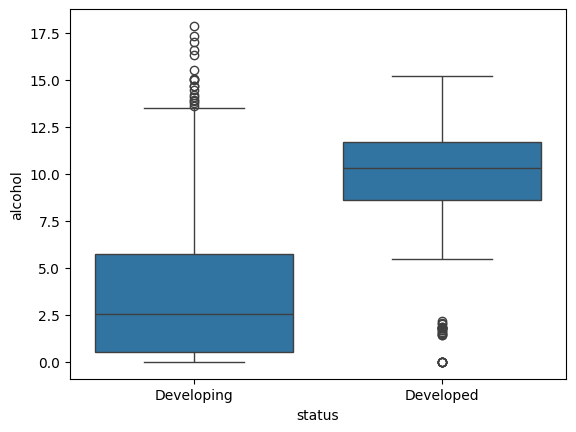

In [ ]:
#boxplot - mostly one categorical vs. one continuous\
#cat var = either country or status
#cont var = rest
# sns.boxplot(x = cat var,  y = cont var)
sns.boxplot(x = df['status'], y = df['alcohol'])

#try one more for me

In [64]:
df.columns

Index(['country', 'year', 'status', 'life-exp', 'adult-mort', 'infant-deaths',
       'alcohol', 'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths',
       'polio', 'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

<Axes: xlabel='school', ylabel='life-exp'>

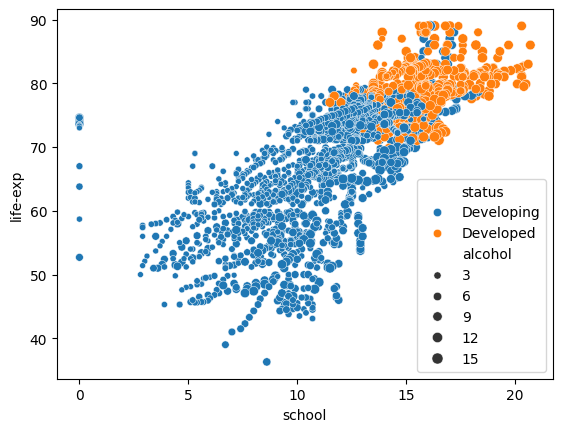

In [ ]:
#scatterplot -  three continuous variables - x, y, size + one cat var (hue)
# sns.scatterplot(x = cont var,  y = cont var, hue = cat var, size = cont var)
sns.scatterplot(x = df['school'], y = df['life-exp'], hue = df['status'], size=df['alcohol'])

#try one more for yourself

In [69]:
df.columns

Index(['country', 'year', 'status', 'life-exp', 'adult-mort', 'infant-deaths',
       'alcohol', 'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths',
       'polio', 'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

In [75]:
#correplot - mostly two continuous
df_no_country = df.drop('country', axis='columns')

In [76]:
df_no_country.columns

Index(['year', 'status', 'life-exp', 'adult-mort', 'infant-deaths', 'alcohol',
       'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths', 'polio',
       'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

In [77]:
#label encoding
#because my status is only two categories, so i just convert them to 0 and 1
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_no_country['status'] = le.fit_transform(df_no_country['status'])
df_no_country['status'].unique()

array([1, 0])

In [ ]:
df_no_country['status'].value_counts() #developing = 2426, and #developed is 512

status
1    2426
0     512
Name: count, dtype: int64

In [80]:
df_no_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               2938 non-null   int64  
 1   status             2938 non-null   int64  
 2   life-exp           2928 non-null   float64
 3   adult-mort         2928 non-null   float64
 4   infant-deaths      2938 non-null   int64  
 5   alcohol            2744 non-null   float64
 6   per-exp            2938 non-null   float64
 7   hepa               2385 non-null   float64
 8   measles            2938 non-null   int64  
 9   bmi                2904 non-null   float64
 10  under-five-deaths  2938 non-null   int64  
 11  polio              2919 non-null   float64
 12  total-exp          2712 non-null   float64
 13  dip                2919 non-null   float64
 14  hiv                2938 non-null   float64
 15  gdp                2490 non-null   float64
 16  pop                2286 

In [72]:
sns.heatmap(df_no_country.corr(), annot=True)


ValueError: could not convert string to float: 'Developing'

In [ ]:
#pps - just like a simulation of linear regression

## 3. Feature Engineering

- Create new features based on existing features

## 4. Feature Selection

- Select salient features X

## 5. Preprocessing

- Imputation
- Scaling

## 6. Modeling

- Compare all regression models using cross validation
- Once you got the best model, do cross validation on only one model with different parameters "Grid search"

## 7. Testing

- Test your model on test set (you should never touch your test set until now)

## 8. Analysis

- Try to come up with explanation of your model
- What works?  What features are important? 
- Why certain models work better?
- How many samples are enough?

## 9. Inference

- Test with real-world data
- You don't really know how good is your model, you just try it

## 10. Deployment

- We gonna skip this, but you have at least beware that there is still a lot to do in deployment

- Deploy your model using FastAPI.  How to host your model in AWS / Azure.